In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('bachelorette.csv')
df

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,Bachelor,01,01_KRISTINA_X,E,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917,Bachelor,01,01_LISA_X,E,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,Bachelor,01,01_PAULA_X,E,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,Bachelor,01,01_RACHEL_X,E,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(df[df.SEASON == 'SEASON'].index, inplace=True)

In [5]:
#seperate bachelor and bachelorette 

In [6]:
grouped = df.groupby(df.SHOW)
bachelorette = grouped.get_group("Bachelorette")
bachelor = grouped.get_group("Bachelor")

## What season has the most eliminated contestants on the first night

### Bachelor:

In [8]:
num_of_eliminated_b = bachelor.loc[(bachelor['ELIMINATION-1']== 'E'),['SEASON','ELIMINATION-1']]
num_of_eliminated_b = num_of_eliminated_b.groupby('SEASON').count()
num_of_eliminated_b = num_of_eliminated_b.rename(columns = {'ELIMINATION-1':'bachelor'})

Text(0, 0.5, 'Number of People')

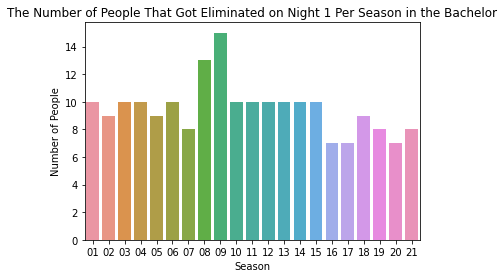

In [9]:
sns.barplot(x = num_of_eliminated_b.index, y = num_of_eliminated_b.bachelor, data = num_of_eliminated_b)
plt.title('The Number of People That Got Eliminated on Night 1 Per Season in the Bachelor')
plt.xlabel('Season')
plt.ylabel('Number of People')

### Bachelorette:

In [10]:
num_of_eliminated_bt = bachelorette.loc[(bachelorette['ELIMINATION-1']== 'E'),['SEASON','ELIMINATION-1']]
num_of_eliminated_bt = num_of_eliminated_bt.groupby('SEASON').count()
num_of_eliminated_bt = num_of_eliminated_bt.rename(columns = {'ELIMINATION-1':'bachelorette'})

Text(0, 0.5, 'Number of People')

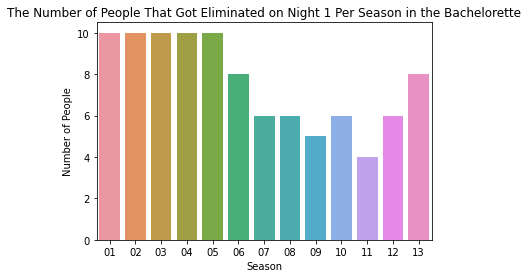

In [11]:
sns.barplot(x = num_of_eliminated_bt.index, y = num_of_eliminated_bt.bachelorette, data = num_of_eliminated_bt)
plt.title('The Number of People That Got Eliminated on Night 1 Per Season in the Bachelorette')
plt.xlabel('Season')
plt.ylabel('Number of People')

## when did the person that got the first rose get eliminated using heatmap 

In [43]:
bachelor['total-r'] = 0
for index, person in bachelor.iterrows():
    for e in range(1,10):
        if person['ELIMINATION-' + str(e)] == 'R' or person['ELIMINATION-' + str(e)] == 'R1':
                bachelor['total-r'][index] = bachelor['total-r'][index] + 1
bachelor['eliminated'] = 0
for index, person in bachelor.iterrows():
    for e in range(2,10):
        if person['ELIMINATION-' + str(e)] == 'E':
             bachelor['eliminated'][index] = e

#sns.barplot(x = 'eliminated', y = 'total-r', data = bachelor) 


new = bachelor[['eliminated','total-r']]
new

# Turn long format into a wide format
df_wide = new.pivot_table( index='eliminated', columns='total-r', values=new)
#df_wide

# ploting it
sns.heatmap(df_wide)


#x=week they were eliminated y=number of roses they had

#sns.scatterplot(data=bachelor, x="eliminated", y="total-r")
# plt.title('The Relationship between How Many Roses a Contestant got and When in the season they got eliminated')
# plt.xlabel('Week that the Contestant was Eliminated')
# plt.ylabel('Number of Roses the Contestant Recieved')

<ipython-input-43-fa57a3c2906c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelor['total-r'] = 0
<ipython-input-43-fa57a3c2906c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelor['total-r'][index] = bachelor['total-r'][index] + 1
<ipython-input-43-fa57a3c2906c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,eliminated,total-r
352,0,2
353,0,3
354,9,2
355,8,2
356,0,3
...,...,...
916,0,0
917,0,0
918,0,0
919,0,0


In [ ]:
# for making the data wide https://www.python-graph-gallery.com/90-heatmaps-with-various-input-format

## What contestants got the first impression rose and won the whole season?

### Bachelor:

In [21]:
bachelor.loc[(bachelor['ELIMINATION-1']== 'R1') & (bachelor['ELIMINATION-10'] == 'W'),['SEASON','CONTESTANT']]

,SEASON,CONTESTANT
352,21,21_VANESSA_G
471,17,17_CATHERINE_G


### Bachelorette:

In [22]:
bachelorette.loc[(bachelorette['ELIMINATION-1']== 'R1') & (bachelorette['ELIMINATION-10'] == 'W'),['SEASON','CONTESTANT']]

,SEASON,CONTESTANT
1,13,13_BRYAN_A
33,12,12_JORDAN_R
191,06,06_ROBERT_M


## Which season had the most unscheduled eliminations?

### Bachelor:

Text(0, 0.5, 'Number of Unscheduled Eliminations')

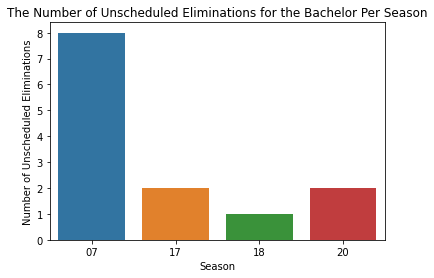

In [44]:
unscheduled_eliminations = bachelor[bachelor.isin(['EU']).any(axis=1)]
unscheduled_eliminations = unscheduled_eliminations.groupby('SEASON').count()
sns.barplot(x = unscheduled_eliminations.index, y = unscheduled_eliminations.CONTESTANT, data = bachelor)
plt.title('The Number of Unscheduled Eliminations for the Bachelor Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Unscheduled Eliminations')

### Bachelorette:

Text(0, 0.5, 'Number of Unscheduled Eliminations')

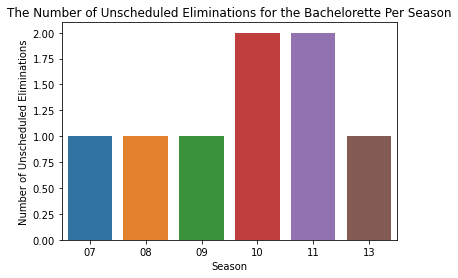

In [42]:
unscheduled_eliminations = bachelorette[bachelorette.isin(['EU']).any(axis=1)]
unscheduled_eliminations = unscheduled_eliminations.groupby('SEASON').count()
sns.barplot(x = unscheduled_eliminations.index, y = unscheduled_eliminations.CONTESTANT, data = bachelorette)
plt.title('The Number of Unscheduled Eliminations for the Bachelorette Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Unscheduled Eliminations')

In [26]:
# got isin from https://www.statology.org/pandas-find-value-any-column/